In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [11]:
x = np.arange(-3, 3, .01)

In [12]:

def sigmoid(x, derivative=False):
  return x*(1-x) if derivative else 1/(1+np.exp(-x))

In [13]:
ytanh = np.tanh(x)

In [14]:
ysig = sigmoid(x)

In [17]:
yrelu = x * (x > 0)
ylrelu = x * (x > 0) * .8 + x * .2

In [20]:
ysoftplus = np.log(1 + np.exp(x))

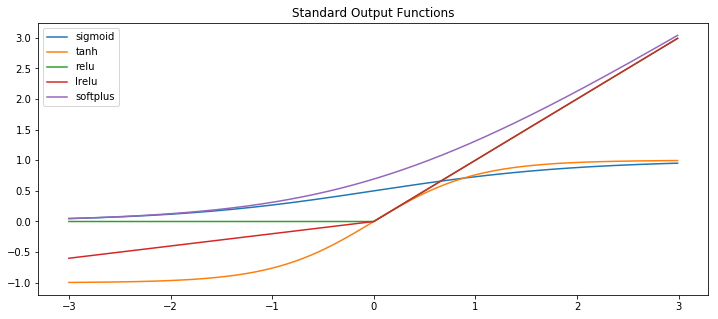

In [27]:
plt.figure(figsize=(12,5))
plt.plot(x, ysig, label='sigmoid')
plt.plot(x, ytanh, label='tanh')
plt.plot(x, yrelu, label='relu')
plt.plot(x, ylrelu, label='lrelu')
plt.plot(x, ysoftplus, label='softplus')
plt.title('Standard Output Functions')
plt.legend()
plt.savefig('outputfunctions.png')

In [47]:
x = (np.random.rand(100) **3) * 1000

In [48]:
x

array([3.38009255e+02, 6.03412182e+00, 7.03794479e+02, 1.24290049e+00,
       3.18735502e+01, 3.98402941e+01, 4.75277049e+01, 1.14808439e+02,
       7.49813697e+02, 3.88192778e+02, 3.22708037e+01, 5.68579811e+02,
       4.98808433e+00, 1.58246274e+01, 2.03946290e+02, 7.68217395e+02,
       3.76750337e+00, 5.74156067e+00, 2.68566781e+02, 6.83695681e+01,
       4.08102066e+00, 8.94328869e+01, 3.20801081e+02, 1.35763639e+00,
       3.52226365e+01, 3.42250083e+02, 5.54876086e+02, 1.54650311e+02,
       6.60413364e+00, 8.79398678e+01, 1.73329070e+01, 7.97231293e+02,
       1.38979443e+02, 2.84698773e+01, 1.25285820e+02, 3.16612210e-01,
       2.14585356e+02, 3.76674660e+02, 2.07570062e+02, 6.38354558e+00,
       6.99136046e+01, 2.41587065e+01, 2.94625174e+02, 3.42339593e+02,
       7.42751003e+01, 2.14192534e+01, 4.32598508e+02, 5.18419360e+02,
       7.53144495e+02, 1.96884005e+02, 5.91953672e+02, 4.32846147e+02,
       3.21600068e+02, 8.23003463e+02, 1.44129231e+02, 3.24686796e+02,
      

In [137]:
y = x - x.mean() + (np.sqrt(np.random.rand(100) * 20000 * x/3) + 1)

In [138]:
from sklearn.svm import SVR
from sklearn.neighbors import NearestNeighbors
from sklearn.ensemble import RandomForestRegressor

In [139]:
clf = SVR(degree=3, C= 2e4).fit(np.expand_dims(x, 1), np.expand_dims(y, 1))

/home/lee/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [140]:
clf = NearestNeighbors(10).fit(np.expand_dims(x, 1), np.expand_dims(y, 1))

In [141]:
clf = RandomForestRegressor(100).fit(np.expand_dims(x, 1), np.expand_dims(y, 1))

/home/lee/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [142]:
yhat = clf.predict(np.expand_dims(x, 1))

Text(0.5, 1.0, 'predictions vs true sales times. Pearson Coef: 0.91')

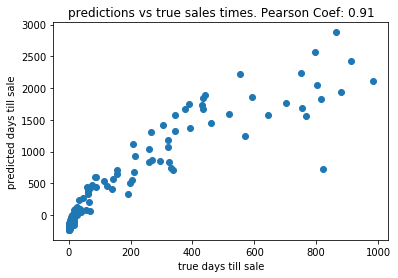

In [147]:
plt.scatter(x, y)
#plt.scatter(x, yhat)
plt.xlabel('true days till sale')
plt.ylabel('predicted days till sale')
plt.title('predictions vs true sales times. Pearson Coef: ' + str(np.corrcoef(x, y)[0,1].round(2)))